# Sentiment Analysis of Social Media Content

(Partial analysis of the group final project)

## Description

This project aims to analyze user-generated content across various social media platforms to uncover sentiment trends and user behavior. The dataset offers a rich source of data, including text-based content, user sentiments, timestamps, hashtags, user engagement metrics (likes and retweets), and geographical information. By exploring this data, we can identify how emotions fluctuate over time, platform, and geography. We will also investigate the correlation between popular content and user engagement metrics.

### Project Timeline :

Week 1: Project introduction and Dataset Exploration
◆    Team formation.
◆    Introduction to the project, objectives, and Sentiment Analysis of Social Media dataset.
◆    Dataset acquisition and initial exploration.

Week 2: Feature Exploration
◆    Data manipulation using Numpy and Pandas.
◆    Exploring the dataset.

Week 3-4: EDA & Visualization
◆    Data manipulation using Numpy and Pandas.
◆    Exploring EDA and visualization techniques.
◆    Select relevant features and formulate the problem statement.

Week 5: Mid-Program Presentation
◆    Present progress achieved till the EDA stage.
◆    Receiving feedback and suggestions for further analysis.

Week 6: Initial Modeling
◆    Begin experimenting with different ML models
◆    Train Initial model and evaluate performance.

Week 7: Hypothesis Testing
◆    Hypothesis testing and further data-driven analysis of factors influencing sentiment and engagement.
◆    Conduct hypothesis testing and statistical analysis.

Week 8: Final Model Training and Interpretation
◆    Train final predictive models incorporating insights from previous analysis.
◆    Interpret results, summarize key insights

Week 9: Final Presentation
◆    Present methodology, results and insights


### Problem Statement:
The primary goal is to perform sentiment analysis, investigate temporal and geographical trends in user-generated content, and analyze platform-specific user behavior. The project will focus on identifying popular topics through hashtags, exploring engagement levels, and understanding regional differences in sentiment trends.


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sentimentdataset.csv to sentimentdataset.csv
User uploaded file "sentimentdataset.csv" with length 170776 bytes


In [2]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt





df = pd.read_csv('sentimentdataset.csv')

### Exploring Data

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1


In [7]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [8]:


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

### Sentiment Analysis

Visualize the distribution of sentiments and examine the emotional landscape of social media platforms.

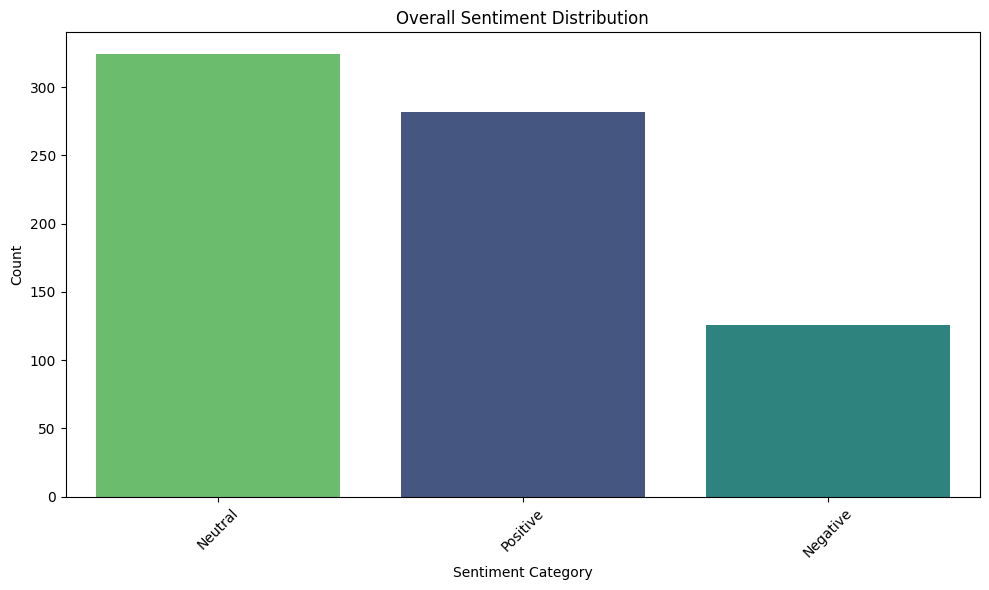

In [9]:

def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Text'].apply(get_sentiment)

# Twitter appears twice
df['Platform'] = df['Platform'].str.strip()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, hue='Sentiment', palette="viridis")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This plot allows to visualize the distribution of sentiments and examine the emotional landscape of social media platforms

### Analysis of reactions and platforms



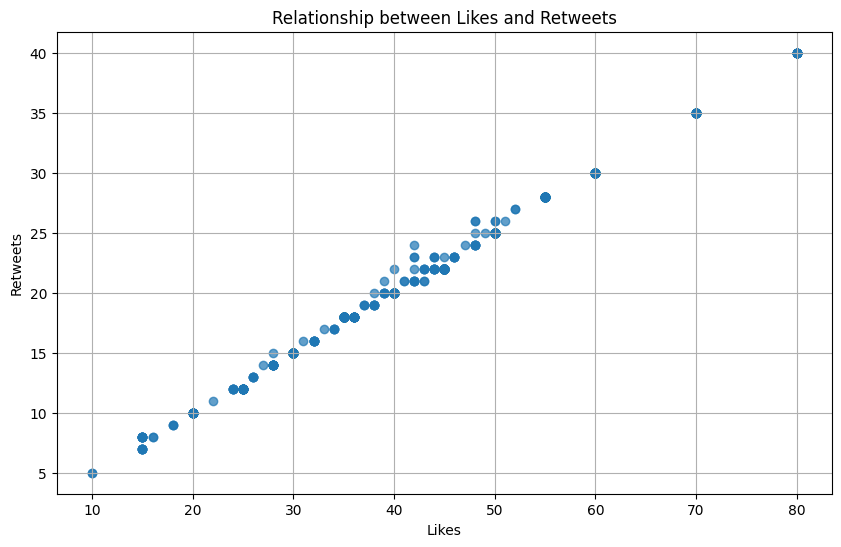

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Likes'], df['Retweets'], alpha=0.7)
plt.title("Relationship between Likes and Retweets")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.grid(True)
plt.show()


plt.show()

The scatter plot above illustrates the relationship between Likes and Retweets. The upward trend suggests a positive correlation: posts that receive more likes also tend to receive more retweets.

In [15]:
# Drop rows with N/A values
df.dropna(inplace=True)

# Drop duplicated rows
df.drop_duplicates(inplace=True)

# You can now continue with your analysis
# Example: Print the info of the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  732 non-null    int64         
 1   Unnamed: 0    732 non-null    int64         
 2   Text          732 non-null    object        
 3   Sentiment     732 non-null    object        
 4   Timestamp     732 non-null    datetime64[ns]
 5   User          732 non-null    object        
 6   Platform      732 non-null    object        
 7   Hashtags      732 non-null    object        
 8   Retweets      732 non-null    float64       
 9   Likes         732 non-null    float64       
 10  Country       732 non-null    object        
 11  Year          732 non-null    int64         
 12  Month         732 non-null    int64         
 13  Day           732 non-null    int64         
 14  Hour          732 non-null    int32         
 15  DayOfWeek     732 non-null    int32     

In [16]:
# Unique values per platform
platform_counts = df.groupby('Platform')['Platform'].count().sort_values(ascending=False)
print("Unique values per platform:\n", platform_counts)

# Unique values per country
country_counts = df.groupby('Country')['Country'].count().sort_values(ascending=False)
print("\nUnique values per country:\n", country_counts)

Unique values per platform:
 Platform
Instagram    258
Twitter      243
Facebook     231
Name: Platform, dtype: int64

Unique values per country:
 Country
USA                    59
USA                    55
UK                     49
Canada                 44
Australia              41
                       ..
Netherlands             1
Netherlands             1
Norway                  1
Peru                    1
India                   1
Name: Country, Length: 115, dtype: int64


In [19]:
# Unique values per country
country_counts = df.groupby('Country')['Country'].count().sort_values(ascending=False)

# Eliminate spaces after country names
df['Country'] = df['Country'].str.strip()

print("\nUnique values per country:\n", country_counts)


Unique values per country:
 Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Denmark             2
Austria             2
Czech Republic      2
Belgium             2
Sweden              2
Cambodia            1
Thailand            1
Scotland            1
Jordan              1
Peru                1
Norway              1
Maldives            1
Kenya               1
Ireland             1
Colombia            1
China               1
Jamaica             1
Name: Country, dtype: int64


<Figure size 1200x600 with 0 Axes>

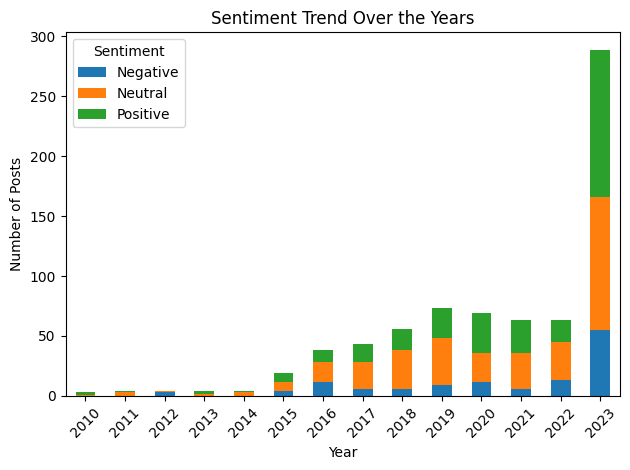

In [20]:
# Convert 'Timestamp' column to datetime objects if not already done
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the year from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year

# Group the data by year and sentiment, and count the occurrences
sentiment_by_year = df.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
sentiment_by_year.plot(kind='bar', stacked=True)  # Stacked bar plot
plt.title('Sentiment Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

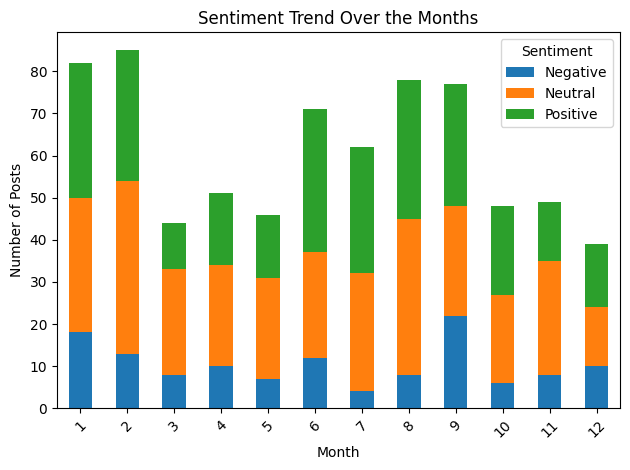

In [21]:
# Extract the month from the 'Timestamp' column
df['Month'] = df['Timestamp'].dt.month

# Group the data by month and sentiment, and count the occurrences
sentiment_by_month = df.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
sentiment_by_month.plot(kind='bar', stacked=True)  # Stacked bar plot
plt.title('Sentiment Trend Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

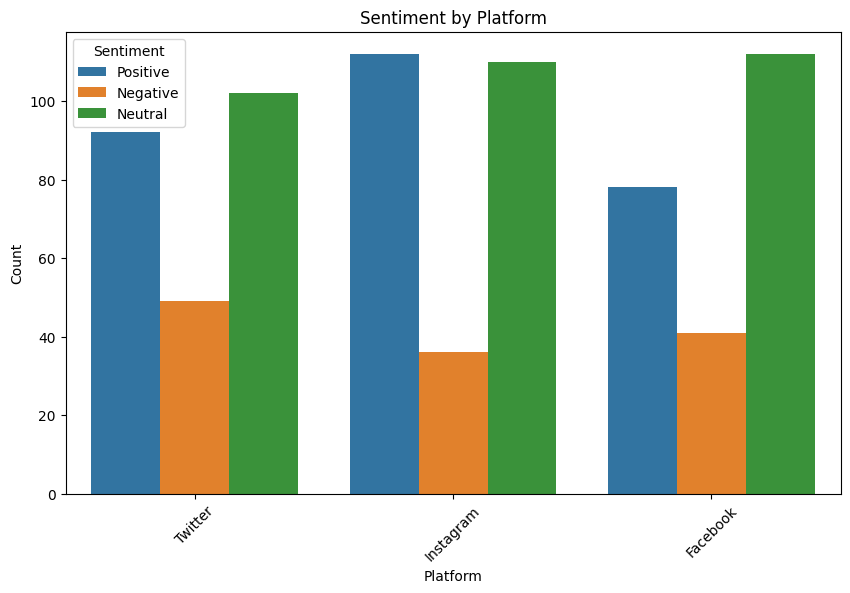

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='Sentiment')
plt.title('Sentiment by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()